# Exercise 3

In [140]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

In [142]:
n = 10_000

## 1. Generate simulated values from the following distributions

### (a) Exponential distribution

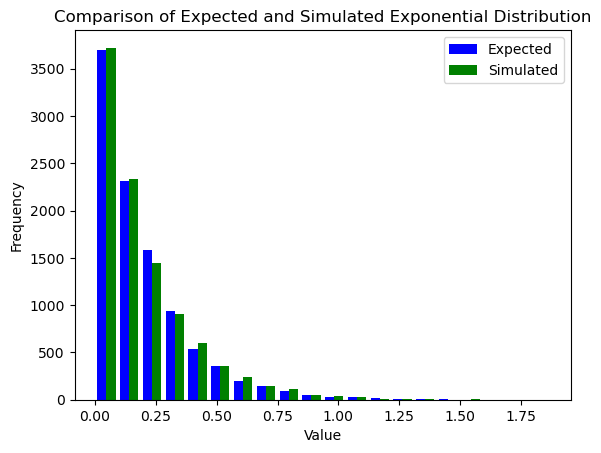

Expected mean: 0.2 vs Simulated mean: 0.20195059048508218
Expected variance: 0.04 vs Simulated variance: 0.040601168280145636
Kolmogorov-Smirnov Test Result:
P-value: 0.34833322133888034


In [144]:
# Exponential distribution

def exponential(lambda_, U):
    X = [-math.log(i)/lambda_ for i in U]
    return X

U = np.random.uniform(0,1,n)
lambda_ = 5
expected_exponential = exponential(lambda_, U)

# Generate simulated exponential examples
simulated_exponential = stats.expon.rvs(scale = 1/lambda_, size = n)

# Plot histograms for expected vs simulated
plt.hist([expected_exponential, simulated_exponential], bins=20, label=["Expected", "Simulated"], 
         color=["blue", "green"])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Comparison of Expected and Simulated Exponential Distribution')
plt.legend(loc='upper right')
plt.show()

# Analytical results comparison to simulated distribution

expected_mean = 1/lambda_
expected_variance = 1/lambda_**2

simulated_mean = np.mean(simulated_exponential)
simulated_variance = np.var(simulated_exponential)

print(f"Expected mean: {expected_mean} vs Simulated mean: {simulated_mean}")
print(f"Expected variance: {expected_variance} vs Simulated variance: {simulated_variance}")

# Perform Kolmogorov-Smirnov test to compare distributions
ts, pvalue = stats.kstest(expected_exponential, simulated_exponential)

# Print the p-value of the KS test
print("Kolmogorov-Smirnov Test Result:")
print(f"P-value: {pvalue}")


### (b) Normal distribution (at least with standard Box-Mueller)

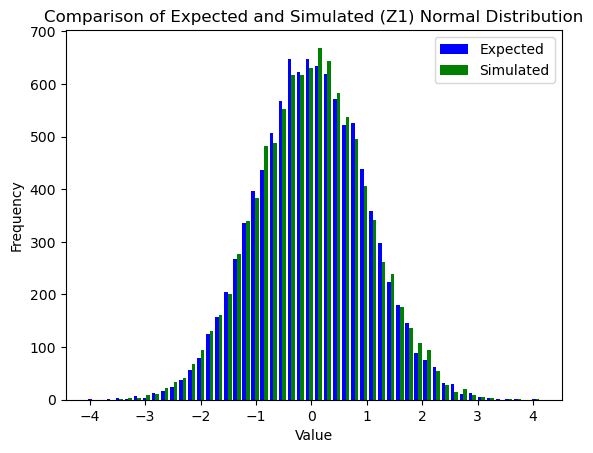

Expected mean: 0 vs Simulated mean: -0.008906313151762687
Expected variance: 1 vs Simulated variance: 1.0042648274851917
Kolmogorov-Smirnov Test Result:
P-value: 0.5806415540561973


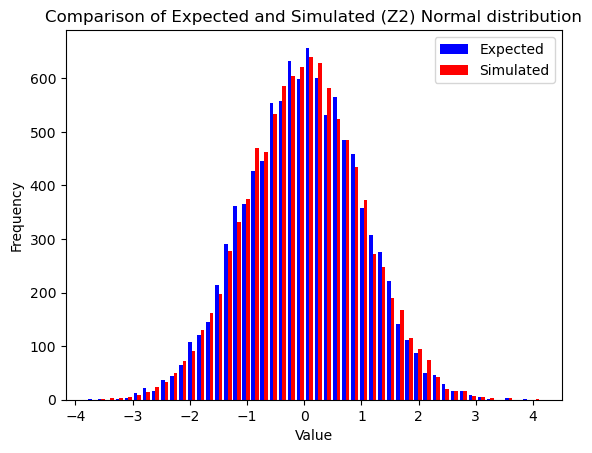

Expected mean: 0 vs Simulated mean: -0.008906313151762687
Expected variance: 1 vs Simulated variance: 1.0042648274851917
Kolmogorov-Smirnov Test Result:
P-value: 0.6756592612416861


In [146]:
# Normal distribution

def normal(U1, U2):
    theta = 2 * np.pi * U2
    r = np.sqrt(-2 * np.log(U1))
    # Acceptance region condition:
    if all(np.sin(theta)**2 + np.cos(theta)**2) <= 1:
        Z1 = r * np.cos(theta) 
        Z2 = r * np.sin(theta)
    return Z1, Z2

U1 = np.random.uniform(0,1,n)
U2 = np.random.uniform(0,1,n)

Z1, Z2 = normal(U1, U2)

# Generate simulated normal examples
simulated_normal = np.random.normal(0, 1, n)

## Z1 ##

# Plot histograms for expected vs simulated
plt.hist([Z1, simulated_normal], bins=50, label=["Expected", "Simulated"], 
         color=["blue", "green"])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Comparison of Expected and Simulated (Z1) Normal Distribution')
plt.legend(loc='upper right')
plt.show()

# Analytical results comparison to simulated distribution

expected_mean = 0
expected_variance = 1

simulated_mean = np.mean(simulated_normal)
simulated_variance = np.var(simulated_normal)

print(f"Expected mean: {expected_mean} vs Simulated mean: {simulated_mean}")
print(f"Expected variance: {expected_variance} vs Simulated variance: {simulated_variance}")

# Perform Kolmogorov-Smirnov test to compare distributions
ts, pvalue = stats.kstest(Z1, simulated_normal)

# Print the p-value of the KS test
print("Kolmogorov-Smirnov Test Result:")
print(f"P-value: {pvalue}")

## Z2 ##

# Plot histograms for expected vs simulated
plt.hist([Z2, simulated_normal], bins=50, label=["Expected", "Simulated"], 
         color=["blue", "red"])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Comparison of Expected and Simulated (Z2) Normal distribution')
plt.legend(loc='upper right')
plt.show()

# Analytical results comparison to simulated distribution
print(f"Expected mean: {expected_mean} vs Simulated mean: {simulated_mean}")
print(f"Expected variance: {expected_variance} vs Simulated variance: {simulated_variance}")

# Perform Kolmogorov-Smirnov test to compare distributions
ts, pvalue = stats.kstest(Z2, simulated_normal)

# Print the p-value of the KS test
print("Kolmogorov-Smirnov Test Result:")
print(f"P-value: {pvalue}")

### (c)  Pareto distribution, with $\beta$ = 1 and experiment with different values of k values: k = 2.05, k = 2.5, k = 3 and k = 4.

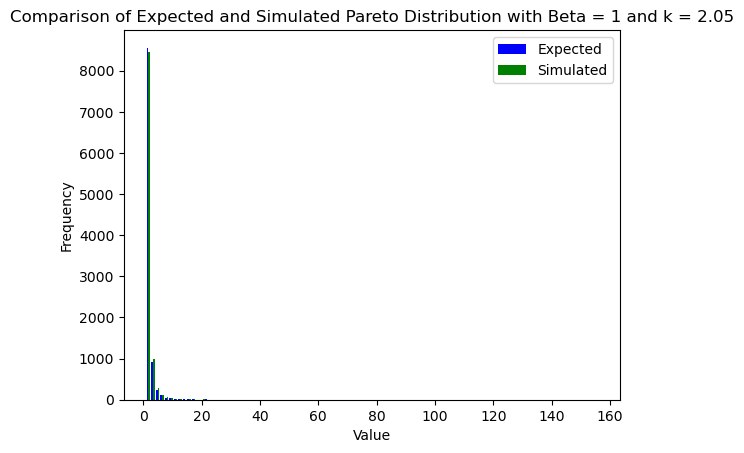

Expected mean: 1.9523809523809526 vs Simulated mean: 1.9700570729110245
Expected variance: 37.18820861678019 vs Simulated variance: 6.647177842768868
Kolmogorov-Smirnov Test Result:
P-value: 0.16993405715882504



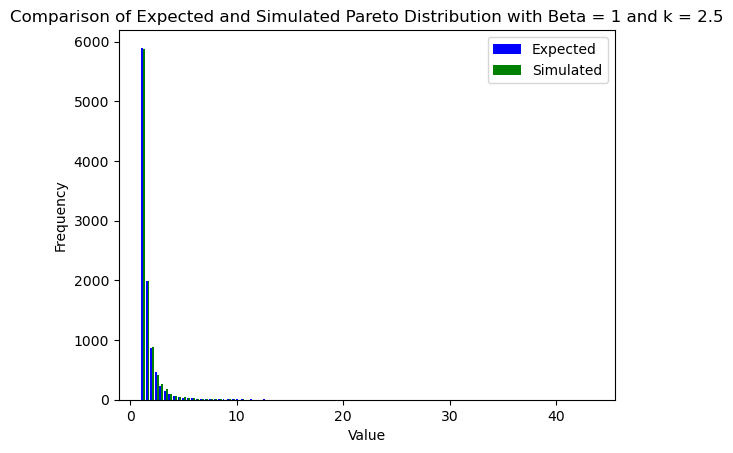

Expected mean: 1.6666666666666667 vs Simulated mean: 1.6632442141550603
Expected variance: 2.2222222222222223 vs Simulated variance: 1.5228575408106801
Kolmogorov-Smirnov Test Result:
P-value: 0.746165905555301



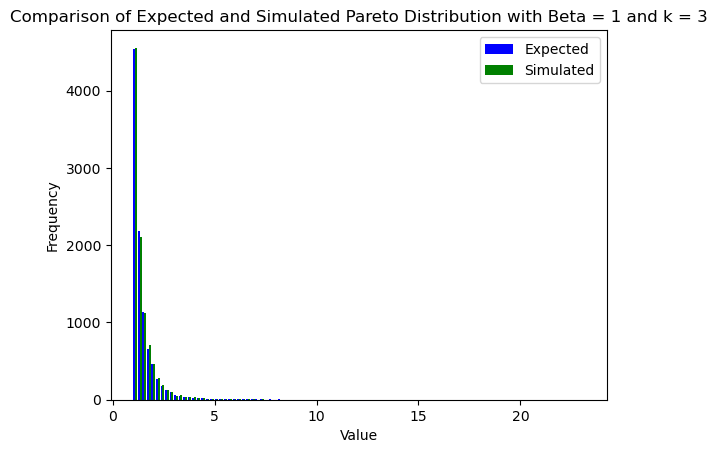

Expected mean: 1.5 vs Simulated mean: 1.4957351721501004
Expected variance: 0.75 vs Simulated variance: 0.6512767713049726
Kolmogorov-Smirnov Test Result:
P-value: 0.8721898676274492



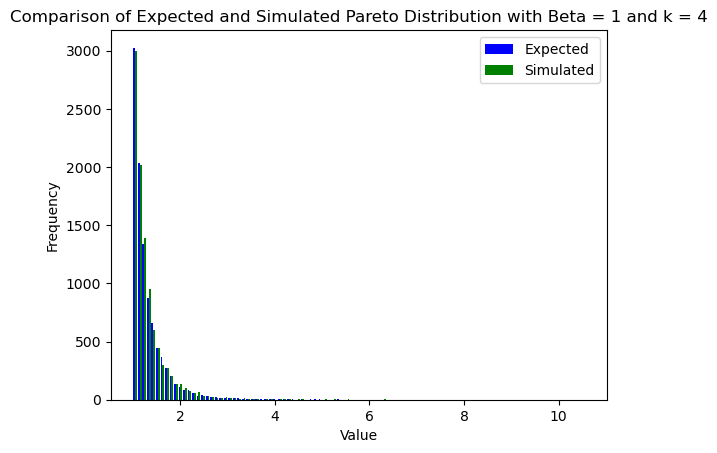

Expected mean: 1.3333333333333333 vs Simulated mean: 1.3281881669032853
Expected variance: 0.2222222222222222 vs Simulated variance: 0.18867918653931004
Kolmogorov-Smirnov Test Result:
P-value: 0.28881767299299355



In [148]:
# Pareto distribution

def pareto(beta, k, U):
    X = beta * (np.power(U,-1/k))
    return X

U = np.random.uniform(0,1,n)
beta = 1
ks = [2.05, 2.5, 3, 4]

for k in ks:
    expected_pareto = pareto(beta, k, U)
    
    # Generate simulated pareto examples
    simulated_pareto = np.random.pareto(k, n) + beta
    
    # Plot histograms for expected vs simulated
    plt.hist([expected_pareto, simulated_pareto], bins=100, label=["Expected", "Simulated"], 
             color=["blue", "green"])
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Comparison of Expected and Simulated Pareto Distribution with Beta = {beta} and k = {k}')
    plt.legend(loc='upper right')
    plt.show()
    
    # Analytical results comparison to simulated distribution
    
    expected_mean = k * beta / (k - 1)
    expected_variance = k * beta**2 / ((k - 2) * (k - 1)**2)
    
    simulated_mean = np.mean(simulated_pareto)
    simulated_variance = np.var(simulated_pareto)
    
    print(f"Expected mean: {expected_mean} vs Simulated mean: {simulated_mean}")
    print(f"Expected variance: {expected_variance} vs Simulated variance: {simulated_variance}")
    
    # Perform Kolmogorov-Smirnov test to compare distributions
    ts, pvalue = stats.kstest(expected_pareto, simulated_pareto)
    
    # Print the p-value of the KS test
    print("Kolmogorov-Smirnov Test Result:")
    print(f"P-value: {pvalue}")
    print('')

## 2. For the Pareto distribution with support on $[\beta, \infty [$ compare mean value and variance, with analytical results, which can be calculated as $E(X) = \beta \frac{k}{k-1}$ (for k > 1) and $Var(X) = \beta^2 \frac{k}{(k-1)^2(k-2)}$ (for k > 2). Explain problems if any.

From the above results we see that the analytical mean is close to the simulated mean, while for the variance we see a greater difference as $k\rightarrow 2$

## 3. For the normal distribution generate 100 95% confidence intervals for the mean and variance, each based on 10 observations. Discuss the results.

**Confidence interval for the mean:**
$$[
\bar{X} \pm t_{\alpha/2, \, n-1} \left( \frac{s}{\sqrt{n}} \right)
]$$

**Confidence interval for the variance:**
$$[
\left( \frac{(n-1)s^2}{\chi^2_{\alpha/2, \, n-1}}, \, \frac{(n-1)s^2}{\chi^2_{1-\alpha/2, \, n-1}} \right)
]$$

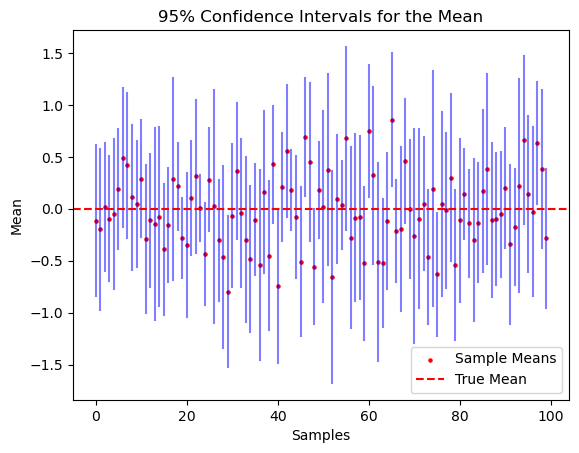

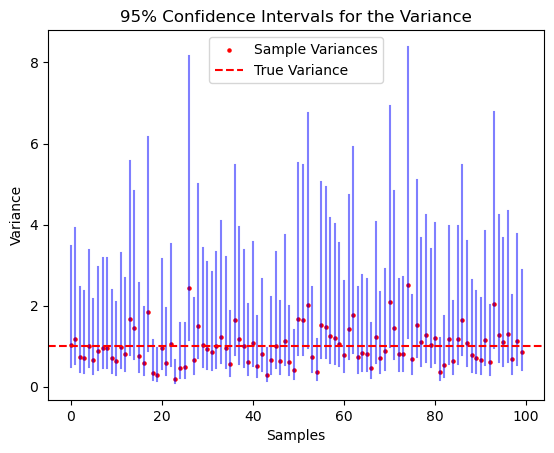

In [64]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters
mu = 0
sigma = 1 
n_obs = 10 
num_intervals = 100 
alpha = 0.05

sample_means = []
ci_means = []
sample_variances = []
ci_variances = []

for _ in range(num_intervals):
    # Generate the samples
    sample = np.random.normal(mu, sigma, n_obs)
    
    # Sample mean and variance
    sample_mean = np.mean(sample)
    sample_variance = np.var(sample, ddof=1)
    
    # 95% confidence interval for the mean
    t_critical = stats.t.ppf(1-alpha/2, df=n_obs-1)
    mean_margin_of_error = t_critical * (sample_variance/n_obs)**0.5
    ci_mean = (sample_mean - mean_margin_of_error, sample_mean + mean_margin_of_error)
    sample_means.append(sample_mean)
    ci_means.append(ci_mean)
    
    # 95% confidence interval for the variance
    chi2_critical_low = stats.chi2.ppf(alpha/2, df=n_obs-1)
    chi2_critical_high = stats.chi2.ppf(1-alpha/2, df=n_obs-1)
    ci_variance = ((n_obs-1)*sample_variance/chi2_critical_high, (n_obs-1)*sample_variance/chi2_critical_low)
    sample_variances.append(sample_variance)
    ci_variances.append(ci_variance)

sample_means = np.array(sample_means)
ci_means = np.array(ci_means)
sample_variances = np.array(sample_variances)
ci_variances = np.array(ci_variances)

# Plotting the confidence intervals for the mean
for i in range(num_intervals):
    plt.plot([i, i], [ci_means[i, 0], ci_means[i, 1]], color='blue', alpha=0.5)
plt.scatter(range(num_intervals), sample_means, color='red', label='Sample Means', s=5)
plt.axhline(y=mu, color='r', linestyle='--', label='True Mean')
plt.xlabel('Samples')
plt.ylabel('Mean')
plt.title('95% Confidence Intervals for the Mean')
plt.legend()
plt.show()

# Plotting the confidence intervals for the variance
for i in range(num_intervals):
    plt.plot([i, i], [ci_variances[i, 0], ci_variances[i, 1]], color='blue', alpha=0.5)
plt.scatter(range(num_intervals), sample_variances, color='red', label='Sample Variances', s=5)
plt.axhline(y=sigma**2, color='r', linestyle='--', label='True Variance')
plt.xlabel('Samples')
plt.ylabel('Variance')
plt.title('95% Confidence Intervals for the Variance')
plt.legend()
plt.show()


We see that...

## 4. Simulate from the Pareto distribution using composition.

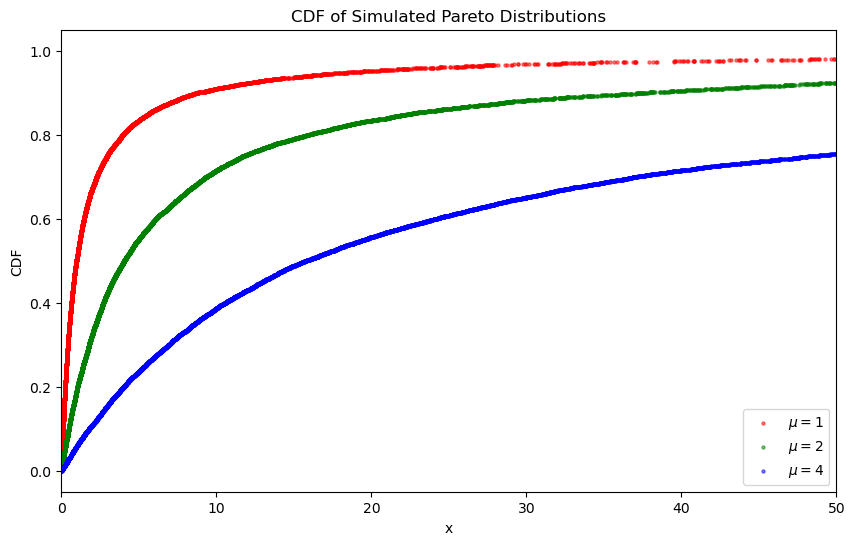

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mus = [1, 2, 4]
n = 10000
colors = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))

for mu, color in zip(mus, colors):
    Y = np.random.exponential(scale=1/mu, size=n)
    X = np.random.exponential(scale=1/Y)
    pareto_simulated = mu * X
    sorted_simulated = np.sort(pareto_simulated)
    empirical_cdf = np.arange(1, n + 1) / n
    plt.scatter(sorted_simulated, empirical_cdf, marker="o", s=5, color=color, alpha=0.5, label=f'$\mu={mu}$')

plt.title("CDF of Simulated Pareto Distributions")
plt.xlabel("x")
plt.xlim(0, 50)
plt.ylabel("CDF")
plt.legend()
plt.show()
